## Multivariate Exploration Practice

We are going to use movies dataset for illustrating multivariate data exploration. 
The dataset is a result of scraping 5000+ movies from the International Movie Database (IMDB) website using a Python library called __scrapy__. 
It has 28 variables for 5043 movies, spanning across 100 years in 66 countries. 
There are 2399 unique director names, and thousands of actors/actresses.

### Loading data

Load the data `/dsa/data/all_datasets/movies/movie_metadata.csv` into R and name the dataframe as `movies_data`

In [2]:
movies_data <- read.csv("/dsa/data/all_datasets/movies/movie_metadata.csv", header = T, sep=",")

In [3]:
head(movies_data)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,,,,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


In [4]:
# Overview of the dataset
str(movies_data)

'data.frame':	5043 obs. of  28 variables:
 $ color                    : Factor w/ 3 levels ""," Black and White",..: 3 3 3 3 1 3 3 3 3 3 ...
 $ director_name            : Factor w/ 2399 levels "","A. Raven Cruz",..: 927 801 2027 377 603 106 2030 1652 1228 551 ...
 $ num_critic_for_reviews   : int  723 302 602 813 NA 462 392 324 635 375 ...
 $ duration                 : int  178 169 148 164 NA 132 156 100 141 153 ...
 $ director_facebook_likes  : int  0 563 0 22000 131 475 0 15 0 282 ...
 $ actor_3_facebook_likes   : int  855 1000 161 23000 NA 530 4000 284 19000 10000 ...
 $ actor_2_name             : Factor w/ 3033 levels "","50 Cent","A. Michael Baldwin",..: 1407 2218 2488 534 2432 2549 1227 801 2439 653 ...
 $ actor_1_facebook_likes   : int  1000 40000 11000 27000 131 640 24000 799 26000 25000 ...
 $ gross                    : int  760505847 309404152 200074175 448130642 NA 73058679 336530303 200807262 458991599 301956980 ...
 $ genres                   : Factor w/ 914 levels "Action

**Question 1.a: ** What are the different categories of movies based on the color attribute?

In [5]:
table(movies_data$color)

# Cells run further below show that 19 movies contain no value (i.e., "") for the color attribute; 0 movies 
# contain a missing (i.e., "NA") value for the color attribute.


                  Black and White            Color 
              19              209             4815 

There are 19 movies with no information for color of the movie. 

In [6]:
summary(movies_data)

              color               director_name  num_critic_for_reviews
                 :  19                   : 104   Min.   :  1.0         
  Black and White: 209   Steven Spielberg:  26   1st Qu.: 50.0         
 Color           :4815   Woody Allen     :  22   Median :110.0         
                         Clint Eastwood  :  20   Mean   :140.2         
                         Martin Scorsese :  20   3rd Qu.:195.0         
                         Ridley Scott    :  17   Max.   :813.0         
                         (Other)         :4834   NA's   :50            
    duration     director_facebook_likes actor_3_facebook_likes
 Min.   :  7.0   Min.   :    0.0         Min.   :    0.0       
 1st Qu.: 93.0   1st Qu.:    7.0         1st Qu.:  133.0       
 Median :103.0   Median :   49.0         Median :  371.5       
 Mean   :107.2   Mean   :  686.5         Mean   :  645.0       
 3rd Qu.:118.0   3rd Qu.:  194.5         3rd Qu.:  636.0       
 Max.   :511.0   Max.   :23000.0        

Looking at the summary of all variables, values are missing for variables director_name and color in many rows. Also NA values exist for multiple variables. NA values can be treated in multiple ways. One way is to replace NA values with the average value of that column. Second approach is to remove the rows that contain NA values. 

The approach in treating NA values is often driven by individual's goals and how one feels about approximating the column value versus removing data for task at hand.

----
Let's see how many NA values are present per row and column. R has built in commands to check if there is a NA value in a row or column.  The is.na() command returns logical values 0 for FALSE (i.e., the cell has a valid value) or 1 for TRUE (i.e., the cell has an NA value). Then there are functions that perform row and column sums.

<div>
    <br>
    <ul>
        <li><span style="color:#cc1652;font-weight:400; font-size:14px">is.na()</span> - will return logical values 0 (FALSE) or 1 (TRUE) when checking if a value is NA.  </li>
        <li><span style="color:#cc1652;font-weight:400; font-size:14px">rowSums()</span> - will sum up the values in a row. </li>
        <li><span style="color:#cc1652;font-weight:400; font-size:14px">colSums()</span> - will sum up the values in a column. </li>
    </ul>
</div>

**Reference:** [rowSums()](https://stat.ethz.ch/R-manual/R-devel/library/base/html/rowsum.html)

**Reference:** [colSums()](https://stat.ethz.ch/R-manual/R-devel/library/base/html/colSums.html)

In [7]:
rowSums(is.na(movies_data))

# Sums the number of values assigned NA in a particular row

[1] 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 2 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 [260] 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 4 0
 [482] 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 [778] 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 [815] 0 0 3 0 0 0 0 2 0 0 0 0 4 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 [963] 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 4
[1037] 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 2 0 0 0 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 3 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[1259] 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
[1407] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 5 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 1 1 0 1 3 1 5 0 0 0 0 0 0
[1518] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1555] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1592] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4
[1666] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1703] 0 0 0 0 0 0 0 1 4 0 0 0 0 0 0 0 1 0 0 0 0 0 2 1 0 2 1 1 1 2 1 1 0 0 4 0 0
[1740] 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1777] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 4 0 0 0 0 0 1 0 0 0 0
[1814] 0 0 1 0 0 4 1 0 0 0 0 0 0 0

In [8]:
colSums(is.na(movies_data))

# Sums the number of values assigned NA in a particular column

color             director_name    num_critic_for_reviews 
                        0                         0                        50 
                 duration   director_facebook_likes    actor_3_facebook_likes 
                       15                       104                        23 
             actor_2_name    actor_1_facebook_likes                     gross 
                        0                         7                       884 
                   genres              actor_1_name               movie_title 
                        0                         0                         0 
          num_voted_users cast_total_facebook_likes              actor_3_name 
                        0                         0                         0 
     facenumber_in_poster             plot_keywords           movie_imdb_link 
                       13                         0                         0 
     num_user_for_reviews                  language                   country 
                       21                         0                         0 
           content_rating                    budget                title_year 
                        0                       492                       108 
   actor_2_facebook_likes                imdb_score              aspect_ratio 
                       13                         0                       329 
     movie_facebook_likes 
                        0

In [9]:
# Use factor() for nominal data to convert their labels
movies_data$color <- factor(movies_data$color, levels = c(""," Black and White","Color"), labels = c(1,2,3)) 
head(movies_data)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
3,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
3,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
3,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
1,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,,,,NA,NA,12,7.1,NA,0
3,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


**Reference: ** [factor()](https://www.r-bloggers.com/data-types-part-3-factors/)

Lets convert the labels of color column back to original values

In [10]:
movies_data$color <- factor(movies_data$color, levels = c(1,2,3), labels = c(""," Black and White","Color")) 

Lets generate a two way table for color and language variables. Calculate proportions of the movies made in different languages by color of the picture. 

In [11]:
movies_by_language_color <- table(movies_data$color,movies_data$language)

movies_by_language_color

# The row above "Black and White" counts values equal to "".  

                  
                        Aboriginal Arabic Aramaic Bosnian Cantonese Chinese
                      6          0      0       0       0         0       0
   Black and White    3          0      0       0       0         2       0
  Color               3          2      5       1       1         9       3
                  
                   Czech Danish Dari Dutch Dzongkha English Filipino French
                       0      0    0     0        0      12        0      0
   Black and White     0      1    0     0        0     184        1      3
  Color                1      4    2     4        1    4508        0     70
                  
                   German Greek Hebrew Hindi Hungarian Icelandic Indonesian
                        0     0      0     0         0         0          0
   Black and White      5     0      0     1         0         0          0
  Color                14     1      5    27         1         2          2
                  
            

prop.table simply generates proprotions of values. Coverting frequency counts into probabilities. 

    prop.table(movies_by_language_color,1),
    
where 1 represents rows and 2 represents columns. If you want column wise proportions use 2 instead of 1.
<br>
round() will round the values according to given level. In our example we are rounding columns of movies_by_language_color table to 2 decimals

    round(prop.table(movies_by_language_color,1),2)
    
Below are the row proportions after rounding the values to four decimal levels

In [12]:
round(prop.table(movies_by_language_color,1),4)

                  
                          Aboriginal Arabic Aramaic Bosnian Cantonese Chinese
                   0.3158     0.0000 0.0000  0.0000  0.0000    0.0000  0.0000
   Black and White 0.0144     0.0000 0.0000  0.0000  0.0000    0.0096  0.0000
  Color            0.0006     0.0004 0.0010  0.0002  0.0002    0.0019  0.0006
                  
                    Czech Danish   Dari  Dutch Dzongkha English Filipino French
                   0.0000 0.0000 0.0000 0.0000   0.0000  0.6316   0.0000 0.0000
   Black and White 0.0000 0.0048 0.0000 0.0000   0.0000  0.8804   0.0048 0.0144
  Color            0.0002 0.0008 0.0004 0.0008   0.0002  0.9362   0.0000 0.0145
                  
                   German  Greek Hebrew  Hindi Hungarian Icelandic Indonesian
                   0.0000 0.0000 0.0000 0.0000    0.0000    0.0000     0.0000
   Black and White 0.0239 0.0000 0.0000 0.0048    0.0000    0.0000     0.0000
  Color            0.0029 0.0002 0.0010 0.0056    0.0002    0.0004     0.0004

**Reference: ** [table()](http://www.cyclismo.org/tutorial/R/tables.html)

----
If you want to convert above proportions in to percentages, simply multiply the values with 100 as shown below.

In [13]:
movies_by_language_color <- round(100*prop.table(movies_by_language_color,1),2)

In [14]:
movies_by_language_color

                  
                         Aboriginal Arabic Aramaic Bosnian Cantonese Chinese
                   31.58       0.00   0.00    0.00    0.00      0.00    0.00
   Black and White  1.44       0.00   0.00    0.00    0.00      0.96    0.00
  Color             0.06       0.04   0.10    0.02    0.02      0.19    0.06
                  
                   Czech Danish  Dari Dutch Dzongkha English Filipino French
                    0.00   0.00  0.00  0.00     0.00   63.16     0.00   0.00
   Black and White  0.00   0.48  0.00  0.00     0.00   88.04     0.48   1.44
  Color             0.02   0.08  0.04  0.08     0.02   93.62     0.00   1.45
                  
                   German Greek Hebrew Hindi Hungarian Icelandic Indonesian
                     0.00  0.00   0.00  0.00      0.00      0.00       0.00
   Black and White   2.39  0.00   0.00  0.48      0.00      0.00       0.00
  Color              0.29  0.02   0.10  0.56      0.02      0.04       0.04
                  
    

**Question 1.b** Perform chi-squared test for language and color variables using the two way table "movies_by_country_color" we created above. 

In [15]:
chisq.test(movies_by_language_color)

# An assumption for the chi-squared test is the "expected cell count," which assumes that each cell has a count of 
# 5 or more and that no cells have an expected count of 0.  When this assumption is not met, Yates's correction
# must be applied. (The violation of this assumption might generate a warning for you.)

# The null hypothesis of the chi-squared test is that the two variables are independent and the alternate 
# hypothesis is that they are related.  The extremely small p-value leads us to reject the null and conclude that 
# the variables are dependent.

Warning message in chisq.test(movies_by_language_color):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  movies_by_language_color
X-squared = 87.063, df = 94, p-value = 0.6808


**Question 2.a: ** subset the movies_data dataset based on NA value for `gross` in the dataset. Name the subset as `na_data` that should contain all rows which has NA for `gross`.

In [16]:
na_data=subset(movies_data, is.na(movies_data$gross))
na_data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
5,,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,,,,NA,NA,12,7.1,NA,0
85,Color,Roland Joffé,10,109,596,283,Alice Englert,622,NA,Action|Adventure|Romance|Sci-Fi,⋯,15,English,Belgium,R,NA,2015,525,4.5,NA,677
99,Color,Hideaki Anno,1,120,28,12,Shin'ya Tsukamoto,544,NA,Action|Adventure|Drama|Horror|Sci-Fi,⋯,13,Japanese,Japan,,NA,2016,106,8.2,2.35,0
178,Color,,21,60,NA,184,Philip Michael Thomas,982,NA,Action|Crime|Drama|Mystery|Thriller,⋯,74,English,USA,TV-14,1500000,NA,321,7.5,1.33,0
200,Color,Matt Birch,1,NA,0,159,Dave Legeno,10000,NA,Action|Fantasy,⋯,2,English,UK,,NA,2011,570,7.5,NA,40
205,Color,Hideaki Anno,1,120,28,12,Shin'ya Tsukamoto,544,NA,Action|Adventure|Drama|Horror|Sci-Fi,⋯,13,Japanese,Japan,,NA,2016,106,8.2,2.35,0
207,Color,Matt Birch,4,NA,0,1000,Toby Jones,10000,NA,Fantasy,⋯,2,English,UK,,NA,2010,2000,6.4,NA,25
243,Color,Frédéric Forestier,33,116,0,141,Santiago Segura,936,NA,Adventure|Comedy|Family|Fantasy,⋯,36,French,France,,78000000,2008,276,5.1,2.35,291
261,Color,,29,60,NA,432,Dirk Benedict,669,NA,Action|Adventure|Crime,⋯,97,English,USA,TV-PG,NA,NA,554,7.6,4.00,0


**Question 2.b: ** What is the distribution of 'NA' values in the `budget` variable in the na_data dataframe. 

In [17]:
table(is.na(na_data$budget))


FALSE  TRUE 
  660   224 

For our analysis lets go ahead and remove the rows that contain any NA values.

In [18]:
nrow(movies_data)
movies_data=na.omit(movies_data)
nrow(movies_data)

[1] 5043

[1] 3801

The number of rows reduced from 5043 to 3801 when excluding all NA values fom the dataset. 
We lost more than 20% of the data after removing those rows. 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: gridExtra
Loading required package: ggplot2


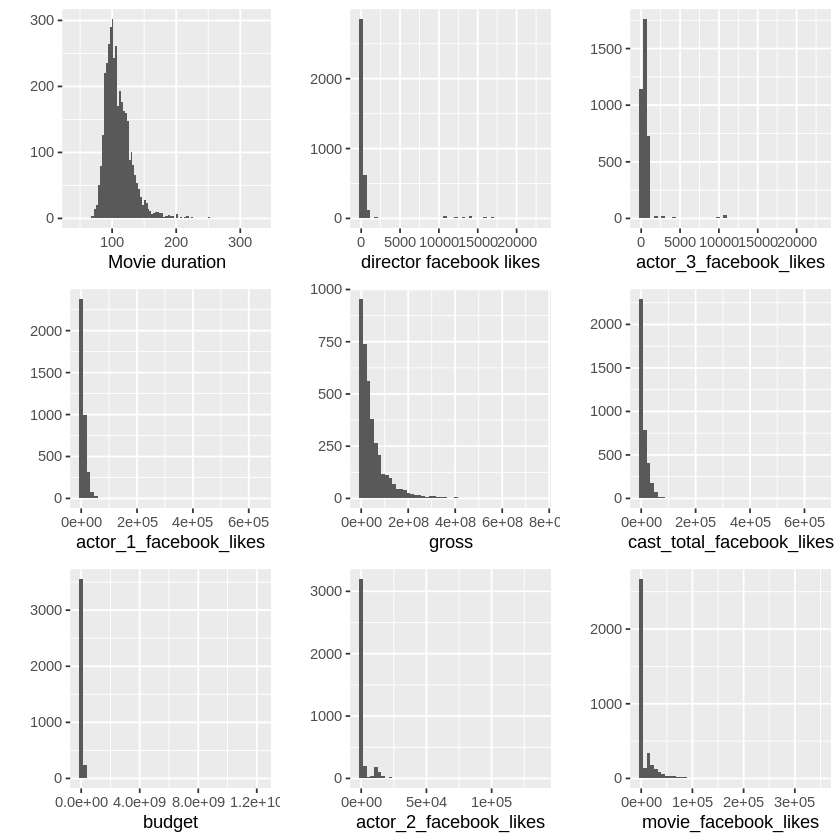

In [19]:
install.packages("gridExtra")

require(gridExtra)
require(ggplot2)

## grid.arrange(x1,x2,x3...xn,ncol=x,nrow=y)
## The command will arrange the plots x1,x2....xn in the desired arrangement of specified rows and columns

# The number of bins should be chosen as appropriate. If you are not sure, then trial and error is the best 
# way to figure the right number of bins. Each bin will have number of observations equal to bin size. 

grid.arrange(qplot(movies_data$duration,bins = 100,xlab='Movie duration'),
             qplot(movies_data$director_facebook_likes,bins = 50,xlab='director facebook likes'),
             qplot(movies_data$actor_3_facebook_likes,bins = 50,xlab='actor_3_facebook_likes'),
             qplot(movies_data$actor_1_facebook_likes,bins = 50,xlab='actor_1_facebook_likes'),
             qplot(movies_data$gross,bins = 50,xlab='gross'),
             qplot(movies_data$cast_total_facebook_likes,bins = 50,xlab='cast_total_facebook_likes'),
             qplot(movies_data$budget,bins = 50,xlab='budget'),
             qplot(movies_data$actor_2_facebook_likes,bins = 50,xlab='actor_2_facebook_likes'),
             qplot(movies_data$movie_facebook_likes,bins = 50,xlab='movie_facebook_likes'),
             ncol = 3)

Looking at the histograms, most of the variables are positively skewed except for movie duration which looks normally distributed. Maximum duration of a movie is 511, which is weird. That movie would last 8 hours 30 minutes. The extreme values in rest of the variables dont seem to be outliers, as some of the movies, directors or actors are very famous compared to rest all movies. A box plot might give us more information about these variables.  

Let's plot box plots for these variables.

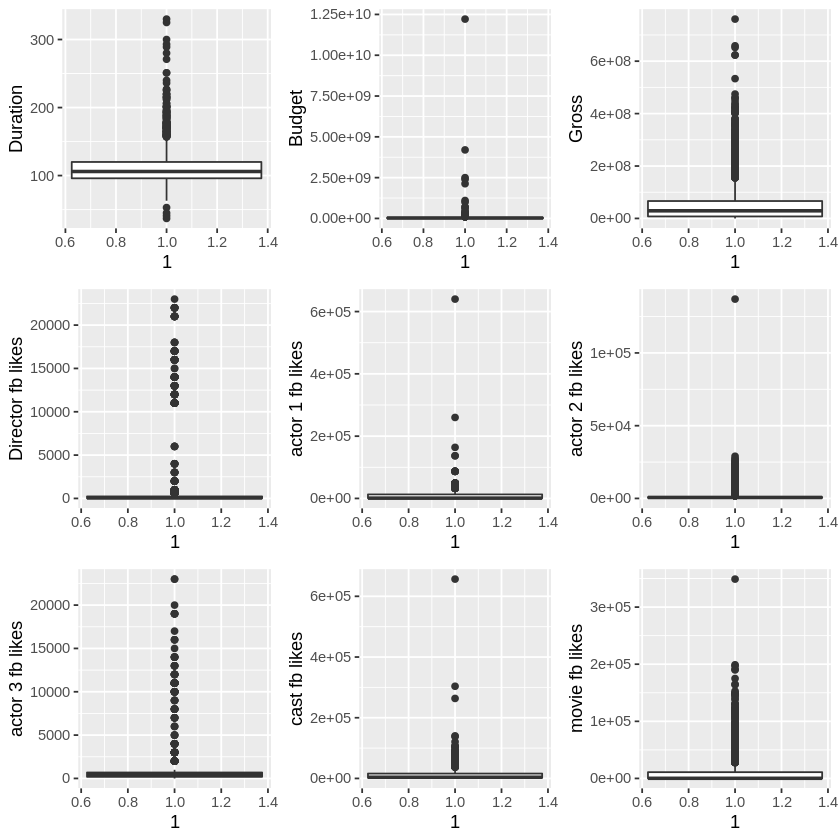

In [20]:
# library(ggplot2)
# require(gridExtra)

grid.arrange(qplot(y=movies_data$duration, x= 1, geom = "boxplot",ylab='Duration'),
             qplot(y=movies_data$budget, x= 1, geom = "boxplot",ylab='Budget'),
             qplot(y=movies_data$gross, x= 1, geom = "boxplot",ylab='Gross'),
             qplot(y=movies_data$director_facebook_likes, x= 1, geom = "boxplot",ylab='Director fb likes'),
             qplot(y=movies_data$actor_1_facebook_likes, x= 1, geom = "boxplot",ylab='actor 1 fb likes'),
             qplot(y=movies_data$actor_2_facebook_likes, x= 1, geom = "boxplot",ylab='actor 2 fb likes'),
             qplot(y=movies_data$actor_3_facebook_likes, x= 1, geom = "boxplot",ylab='actor 3 fb likes'),
             qplot(y=movies_data$cast_total_facebook_likes, x= 1, geom = "boxplot",ylab='cast fb likes'),
             qplot(y=movies_data$movie_facebook_likes, x= 1, geom = "boxplot",ylab='movie fb likes'),
             ncol=3,nrow=3)

Above box plots do not show any interesting patterns. Data has extreme outliers so the plots are not very telling. The only column in the dataset which tells us if a movie is good or not is the imdb_score. 

Movies with higher rating anything above 8 will end up in IMDB top 250. They are considered as good by the critics. Movies with rating 7 to 8 are probably still good movies. Movies with rating 6 to 7 can be ok to watch but viewers may not gain anything from them. At last, movies with ratings 1 to 5 are generally considered as bad movies.

**Question 3: ** Add the values in the columns director_facebook_likes, actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes, actor_2_facebook_likes, movie_facebook_likes for every row in the dataset to find the total facebook likes a movie can claim.  

Hint: Use the appropriate apply() function to add the values.

In [21]:
# result = sapply(movies_data, sum(movies_data$director_facebook_likes, movies_data$actor_3_facebook_likes,
#                 movies_data$actor_1_facebook_likes,movies_data$cast_total_facebook_likes, 
#        movies_data$actor_2_facebook_likes, movies_data$movie_facebook_likes))

result = (movies_data$director_facebook_likes+ movies_data$actor_3_facebook_likes+
                movies_data$actor_1_facebook_likes+movies_data$cast_total_facebook_likes+ 
       movies_data$actor_2_facebook_likes+ movies_data$movie_facebook_likes)

head(result)


[1]  40625  94913 108254 365759  28150  85055

**Question 4: ** Summarize the data for columns country and color using a 2-way table. Add row and column sums at the end using addmargins() function. 

In [23]:
color_country <- table(movies_data$country,movies_data$color)
addmargins(color_country)

# The column to the left of "Black and White" contains cell counts for the number of values equal to "". 

,,Black and White,Color,Sum
,0,0,0,0
Afghanistan,0,0,1,1
Argentina,0,0,3,3
Aruba,0,0,1,1
Australia,0,1,39,40
Bahamas,0,0,0,0
Belgium,0,0,2,2
Brazil,0,0,5,5
Bulgaria,0,0,0,0
Cambodia,0,0,0,0


**Question 5: ** Find correlation of all variables in movies_data dataframe by excluding all the factor variables in the dataset.

In [ ]:
# Create a dataframe excluding all factor variables in movies_data.
# sapply() will generate column types for each column. %in% will check each column type with "factor" 
# and return TRUE or FALSE.
# TRUE or FALSE will determine which rows to select and which not to select when assigning movies_data to less_data

less_data=movies_data[!<what goes in here>(movies_data,class) %<what goes in here>% c("<what goes in here>")]
cor(less_data)

Imdb score is the variable of interest in our movies dataset. Above correlation matrix tells us none of the continous variables are highly correlated with imdb_score. Following table shows how different variables are correlated with imdb_score. 

|Feature |imdb_score for population|
|-|-------------------------|
|num_critic_for_reviews|0.3438808|
|duration|0.36612369|
|director_facebook_likes|0.19083814|
|actor_3_facebook_likes|0.06497354|
|actor_1_facebook_likes|0.09313142|
|gross|0.21212439|
|num_voted_users|0.47791732|
|cast_total_facebook_likes|0.1062587|
|num_user_for_reviews|0.32252237|
|budget|0.02904057|
|title_year|-0.12926516|
|actor_2_facebook_likes|0.10206038|
|aspect_ratio|0.02845372|
|movie_facebook_likes|0.2794777|

With a 0.2 threshold for correlation, the 6 variables num_critic_for_reviews, duration, gross, num_voted_users, num_user_for_reviews and movie_facebook_likes look like promising predictors of imdb_score.

**Question 6: **Draw a plot with imdb_score on x-axis, num_voted_users on y-axis for movies_data dataset. Use color variable for color parameter and duration for size parameter. 

In [ ]:
options(scipen=999)  

ggplot(movies_data,
       aes(x=imdb_score,        # independet variable, feature 1
           y=num_voted_users,              # dependent variable, feature 2
           color=<what goes in here>,  # independet variable, feature 3
           size=duration),      # independet variable, feature 4
       xlab("IMDB Score"),
       ylab("Number of voted users"),
       main("IMDB rating vs No. of voted users")
      ) + <what goes in here>

**Question 7: **Draw a plot with imdb_score on x-axis, director_facebook_likes on y-axis for movies_data dataset. Use color variable for color parameter and gross for size parameter. Debug/modify the code to generate the plot.

In [ ]:
options(scipen=999)  
library(ggplot2)
ggplot(movies_data,
       aes(x=imdb_score,        # independet variable, feature 1
           y=director_facebook_likes,              # dependent variable, feature 2
           color=<what goes in here>,  # independet variable, feature 3
           size=<what goes in here>)  +    # independet variable, feature 4
       xlab("IMDB Score") +
       ylab("Director fb likes")+
       labs(title="IMDB rating vs Director fb likes")
       +geom_point()

**Question 8.a: **Draw a plot with imdb_score on x-axis, director_facebook_likes on y-axis for movies_data dataset. Use movie_facebook_likes variable for color parameter and gross for size parameter. 

In [ ]:
options(scipen=999)  
library(ggplot2)
ggplot(movies_data,
       aes(x=imdb_score,        # independet variable, feature 1
           y=<what goes in here>,              # dependent variable, feature 2
           <what goes in here>=movie_facebook_likes,  # independet variable, feature 3
           size=gross)+      # independet variable, feature 4
       xlab("IMDB Score")+
       ylab("Director fb likes")+
       main("IMDB rating vs Director fb likes")
      ) +geom_point()

**Question 8.b: ** Write in a few words about your observations about the plot.

**Question 9.a: **Draw a plot with imdb_score on x-axis, num_voted_users on y-axis for movies_data dataset. Use num_user_for_reviews variable for color parameter and gross for size parameter, color variable for shape parameter. 

In [ ]:
options(scipen=999)  
library(ggplot2)
ggplot(movies_data,
       aes(x=imdb_score,        # independet variable, feature 1
           y=num_voted_users,              # dependent variable, feature 2
           color=num_user_for_reviews,  # independet variable, feature 3
           size=gross,                  # independet variable, feature 4
          <what goes in here>=<what goes in here>),      # independet variable, feature 5
       xlab("IMDB Score"),
       ylab("Director fb likes"),
       main("IMDB rating vs No of voted users")
      ) +geom_point()

**Question 9.b: ** Write in a few words about your observations about the plot.

**Question 10.a: **Draw a 3d scatterplot with imdb_score on x-axis, num_voted_users on y-axis and num_user_for_reviews on z-axis for movies_data dataset. Use imdb_score variable variable for color parameter. Modify/complete the code to generate the plot.

In [ ]:
library(scatterplot3d)
#Assigning a color to ranges of bathrooms
movies_data$colors[movies_data$imdb_score<=2] <- "green"
movies_data$colors[movies_data$imdb_score>=3 & movies_data$imdb_score<4] <- "magenta"
movies_data$colors[movies_data$imdb_score>=4 & movies_data$imdb_score<5] <- "red"
movies_data$colors[movies_data$imdb_score>=5 & movies_data$imdb_score<6] <- "blue"
movies_data$colors[movies_data$imdb_score>=6 & movies_data$imdb_score<7] <- "orange"
movies_data$colors[movies_data$imdb_score>=7 & movies_data$imdb_score<8] <- "cyan"
movies_data$colors[movies_data$imdb_score>=8 & movies_data$imdb_score<9] <- "purple"
movies_data$colors[movies_data$imdb_score>=9 & movies_data$imdb_score<10] <- "black"


<what goes in here>(movies_data, {
   # The scatter plot 3D was introduced in the extra / optional notebooks last week.
   # This function produces a three dimensional plot of points using 3 variables for position, instead of just 2.
                 #   x,        y,   and    z axis
   scatterplot3d(imdb_score, num_voted_users, num_user_for_reviews,       
                 <what goes in here>=<what goes in here>,             # put lines on the horizontal plane
                 angle = 45,           # angle=45 denotes how graph is oriented,
                 pch = 16,             # pch=16 denotes shape used to denote points on the plot
                 color=colors,         #color=colors suggests to colors variable created above
                 main="IMDB score vs user votes & reviews",        
                 xlab="IMDB Score",
                 ylab="No. of voted users",
                 zlab="No of user reviews")

legend("topleft", inset=.05,      # location where the legend should be positioned on the graph
    bty="n", cex=.5,              # suppress legend box, shrink text 50%
    title="IMDB score", 
    c("<2", "3 - 3.9", "4 - 4.9", "5 - 5.9", "6 - 6.9", "7 - 7.9", "8 - 8.9", "9 - 9.9"), 
       fill=c("green", "magenta", "red", "blue", "orange", "cyan", "purple", "black"))
}) # ends the context of the with()

**Question 10.b: ** Write in a few words about your observations about the plot.

# SAVE YOUR NOTEBOOK